xtest: [0.17756418 0.9625969  0.41925027 0.42405245 0.46314887 0.37372315
 0.4655081  0.03516826 0.08427267 0.7325207 ]
x_train: [0.33464753 0.97805808 0.62458211 0.95031352 0.76747565 0.82500925
 0.4066403  0.45130841 0.40063163 0.99513816]


(0.7, 1.1)

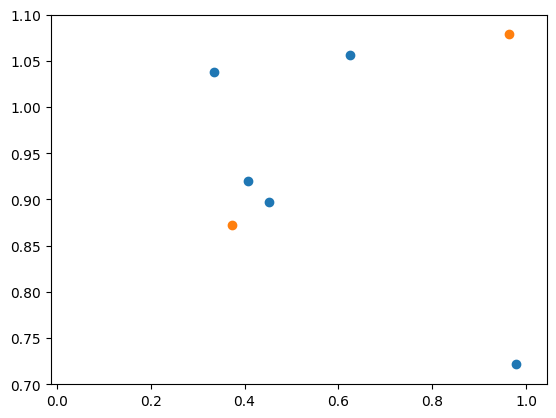

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

n_sample = 10 

x_train  = np.random.uniform(0,1,n_sample)
x_test = np.random.uniform(0,1,n_sample)
print('xtest:',x_test)
print( 'x_train:',x_train)
np.random.seed(12)

noise_train = np.random.normal(loc = 0.0 , scale= 0.3 , size=n_sample)

noise_test = np.random.normal(loc = 0.0 , scale= 0.3 , size=n_sample)

y_train = np.sin(1 + x_train**2) + noise_train
y_test = np.sin(1 +x_test**2 ) + noise_test


plt.scatter(x_train , y_train)
plt.scatter(x_test , y_test)

plt.ylim([0.7 , 1.1])


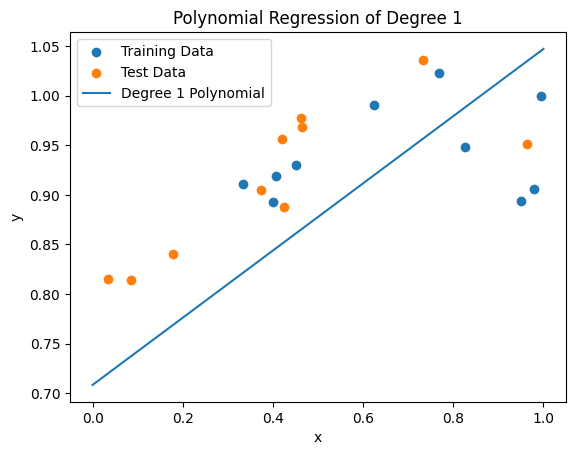

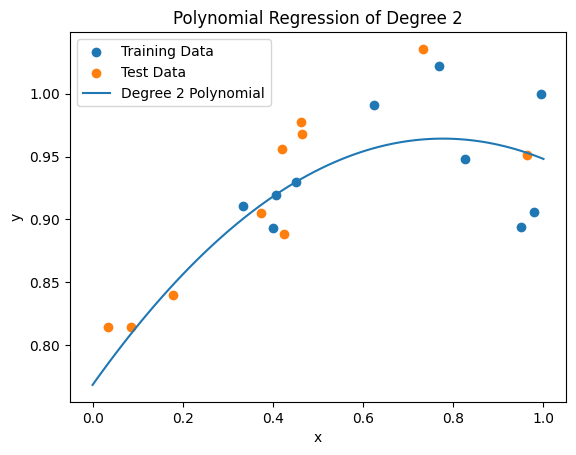

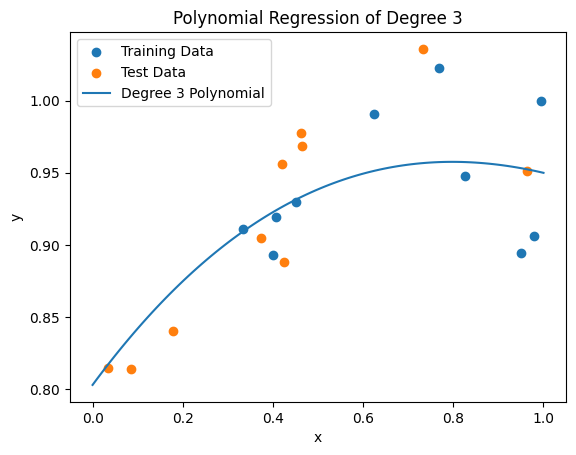

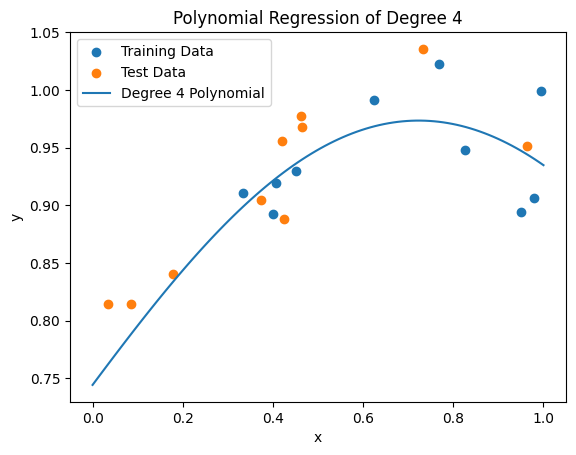

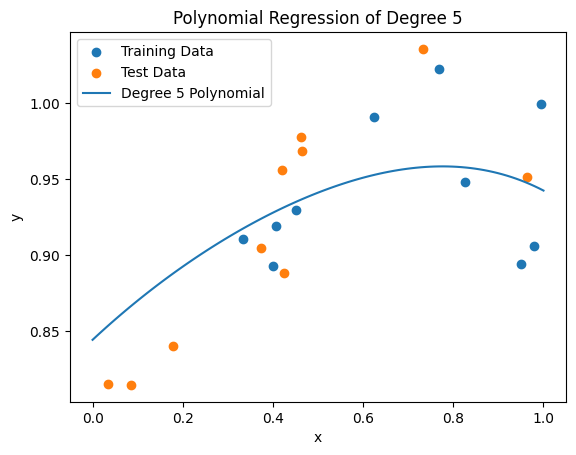

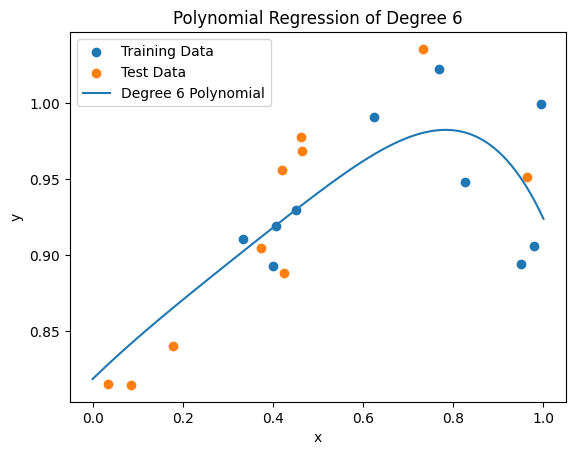

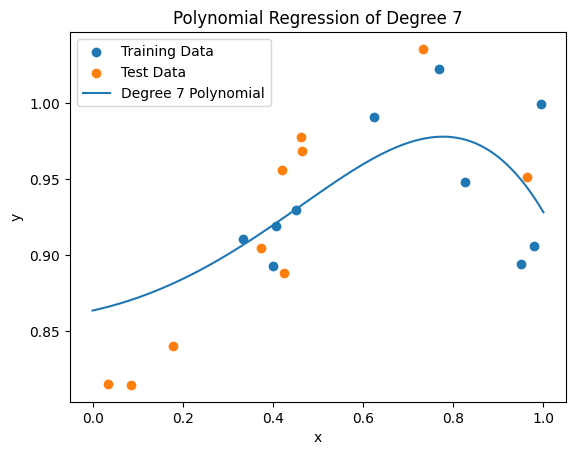

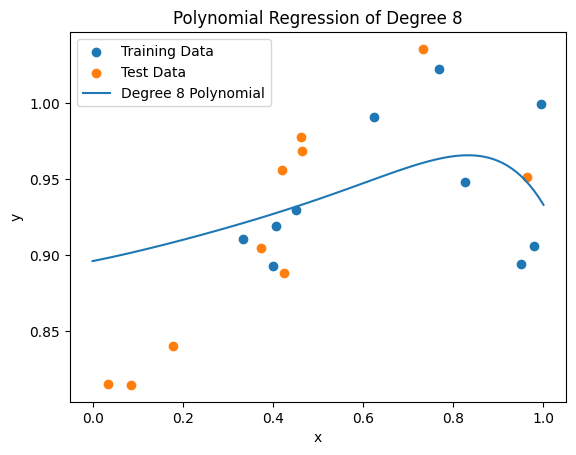

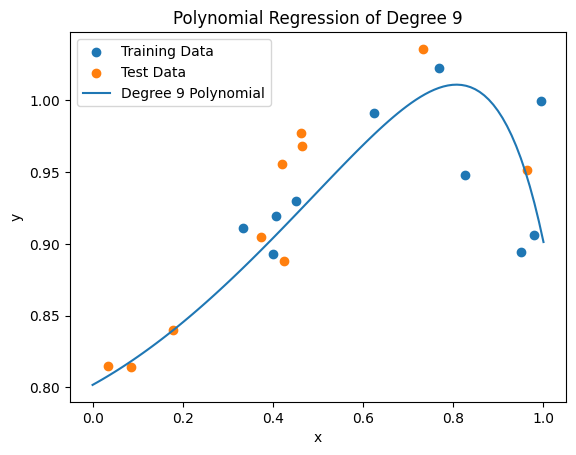

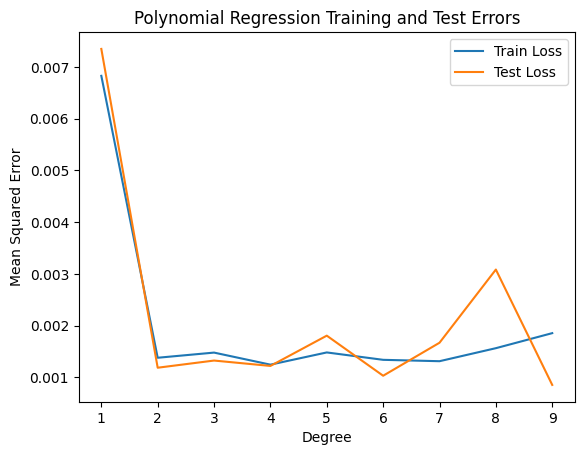

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Generate sample data
n_samples = 10
x_train = np.random.uniform(0, 1, n_samples)
x_test = np.random.uniform(0, 1, n_samples)
np.random.seed(12)
noise_train = np.random.normal(loc=0.0, scale=0.03, size=n_samples)
noise_test = np.random.normal(loc=0.0, scale=0.03, size=n_samples)
y_train = np.sin(1 + x_train**2) + noise_train
y_test = np.sin(1 + x_test**2) + noise_test

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define polynomial regression model
class PolynomialRegression(nn.Module):
    def __init__(self, degree):
        super(PolynomialRegression, self).__init__()
        self.degree = degree
        self.linear = nn.Linear(degree + 1, 1)

    def forward(self, x):
        x_poly = torch.cat([x**i for i in range(self.degree + 1)], 1)
        return self.linear(x_poly)

# Train polynomial regression models of degrees 1 to 9
degrees = range(1, 10)
train_losses = []
test_losses = []

for degree in degrees:
    model = PolynomialRegression(degree)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    for epoch in range(1000):
        optimizer.zero_grad()
        outputs = model(x_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    train_loss = criterion(model(x_train_tensor), y_train_tensor).item()
    test_loss = criterion(model(x_test_tensor), y_test_tensor).item()

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Plot the data points
    plt.scatter(x_train, y_train, label='Training Data')
    plt.scatter(x_test, y_test, label='Test Data')

    # Plot the polynomial regression line
    with torch.no_grad():
        x_values = torch.linspace(0, 1, 100).view(-1, 1)
        y_values = model(x_values).numpy()
        plt.plot(x_values.numpy(), y_values, label=f'Degree {degree} Polynomial')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression of Degree {degree}')
    plt.legend()
    plt.show()

# Plot training and test errors
plt.plot(degrees, train_losses, label='Train Loss')
plt.plot(degrees, test_losses, label='Test Loss')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression Training and Test Errors')
plt.legend()
plt.show()
